In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


C:\ProgramData\Anaconda3\envs\AutonomousCar\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir = "C:\\Users\\farmin\\Documents\\Practice\\Code Basic\\Training"
data_dir_t = "C:\\Users\\farmin\\Documents\\Practice\\Code Basic\\Test"

In [3]:
import pathlib
data_dir_train = pathlib.Path(data_dir)
data_dir_test = pathlib.Path(data_dir_t)
data_dir_train

WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training')

In [35]:
LIST_Train = list(data_dir_train.glob('*/*.jpg'))
LIST_Test = list(data_dir_test.glob('*/*.jpg'))
fruits = os.listdir(data_dir_train)


In [5]:
fruits = []
for i in os.listdir(data_dir_train):
    fruits.append(i) 
    
#fruits

In [109]:
#Counting each label total number
fruit =[]
for i in os.listdir(data_dir):
    #fruits.append(i)
    for image_filename in os.listdir(data_dir + "\\" + i):
        fruit.append(i) 
        #fruits_image.append(i + '/' + image_filename)

In [101]:
list(data_dir_train.glob('Apple Braeburn/*'))

[WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/0_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/100_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/101_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/102_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/103_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/104_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/105_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/106_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/107_100.jpg'),
 WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Training/Apple Braeburn/108_100.jpg'),
 WindowsPath

In [6]:
fruit_images_dict_train = {}
for i in fruits:
    #print(i)
    fruit_images_dict_train[i] = list(data_dir_train.glob(i + "/*"))
     #'roses': list(data_dir.glob('roses/*')),
#fruit_images_dict_train
len(fruit_images_dict_train['Apple Braeburn'])

492

In [7]:
fruit_images_dict_test = {}
for i in fruits:
    #print(i)
    fruit_images_dict_test[i] = list(data_dir_test.glob(i + "/*"))
     #'roses': list(data_dir.glob('roses/*')),
fruit_images_dict_test
#len(fruit_images_dict_test['Apple Braeburn'])

{'Apple Braeburn': [WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/321_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/322_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/323_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/324_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/325_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/326_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/327_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/32_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/33_100.jpg'),
  WindowsPath('C:/Users/farmin/Documents/Practice/Code Basic/Test/Apple Braeburn/34_100.jpg'),
  WindowsPath('C:/Users/f

In [36]:
#Creating frui_label dictionary
fruit_label = {}
val = 0
for i in fruits:
    fruit_label[i] = val 
    val += 1
#fruit_label
filename = "Fruit_list_label.txt"

# Writing the list of dict objects to a file
with open(filename, mode='w') as f:
    f.write(str(fruit_label))

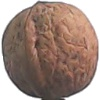

In [9]:
Walnut = list(data_dir_train.glob('Walnut/*'))
Image.open(str(Walnut[0]))

In [10]:
Image.open(str(x[100]))

NameError: name 'x' is not defined

In [11]:
X, y = [], []

for fruit_name, images in fruit_images_dict_train.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(fruit_label[fruit_name])


In [12]:
X_test, y_test = [], []

for fruit_name, images in fruit_images_dict_test.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X_test.append(resized_img)
        y_test.append(fruit_label[fruit_name])


[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [13]:
X_train = np.array(X)
X_test = np.array(X_test)
y_train = np.array(y)
y_test = np.array(y_test)


In [38]:
X_train_scaled = X_train
X_test_scaled = X_test


In [15]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [16]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) # false means freeze

In [17]:
num_of_fruits = len(fruits)

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_fruits)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 81)                103761    
                                                                 
Total params: 2,361,745
Trainable params: 103,761
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #from_logits = True signifies the values of the loss obtained by the model are not normalized and is basically used when we don't have any softmax function in our model
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1292/1292 [==============================] - 299s 228ms/step - loss: 0.5246 - acc: 0.9133
Epoch 2/5
1292/1292 [==============================] - 286s 221ms/step - loss: 0.0668 - acc: 0.9917
Epoch 3/5
1292/1292 [==============================] - 272s 210ms/step - loss: 0.0343 - acc: 0.9941
Epoch 4/5
1292/1292 [==============================] - 271s 210ms/step - loss: 0.0239 - acc: 0.9942
Epoch 5/5
1292/1292 [==============================] - 256s 198ms/step - loss: 0.0166 - acc: 0.9951


In [19]:
X_test_scaled

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [20]:
model.evaluate(X_test_scaled,y_test)

434/434 [==============================] - 86s 197ms/step - loss: 0.0894 - acc: 0.9756


[0.08939934521913528, 0.9756431579589844]

In [21]:
predictions = model.predict(X_test_scaled)

434/434 [==============================] - 92s 211ms/step


In [24]:
score = predictions[200]
predic_index = np.argmax(score)
predic_index

1

In [25]:
print("One line Code Key value: ", list(fruit_label.keys())
      [list(fruit_label.values()).index(predic_index)])

One line Code Key value:  Apple Golden 1


In [26]:
y_test[200]

1

In [28]:
model.save("Fruit Classify.model")

INFO:tensorflow:Assets written to: Fruit Classify.model\assets


INFO:tensorflow:Assets written to: Fruit Classify.model\assets
